In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

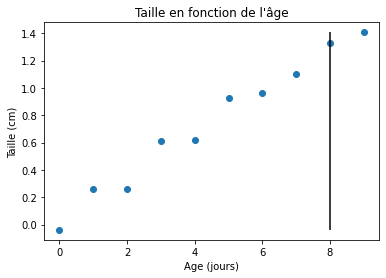

In [3]:
df = pd.read_csv('C:/Users/Al_Ce/Desktop/data IA formation/algo/régression linéaire/insect.csv')
plt.scatter(df['age (jours)'], df['taille (cm)'])
plt.title("Taille en fonction de l'âge")
plt.xlabel("Age (jours)")
plt.ylabel("Taille (cm)")
age = 8
plt.vlines(age, min(df['taille (cm)']), max(df['taille (cm)']))

In [5]:
df

,Unnamed: 0,age (jours),taille (cm)
0,0,0,-0.039410
1,1,1,0.256920
2,2,2,0.262810
3,3,3,0.612230
4,4,4,0.617459
5,5,5,0.928427
6,6,6,0.965546
7,7,7,1.103547
8,8,8,1.331729
9,9,9,1.407364


In [6]:
df.columns

Index(['Unnamed: 0', 'age (jours)', 'taille (cm)'], dtype='object')

In [9]:
taille = df['taille (cm)'].values
taille

array([-0.0394098 ,  0.25691968,  0.26281047,  0.61223037,  0.61745876,
        0.92842658,  0.96554617,  1.10354682,  1.33172865,  1.40736414])

In [11]:
age = df['age (jours)'].values
age

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [15]:
moyenne_age = np.mean(age)
moyenne_taille = np.mean(taille)
print(moyenne_age, moyenne_taille)

4.5 0.7446621840042198


In [16]:
m = len(age)

In [36]:
numerator = 0
denominator = 0
for i in range(m):
    numer += (age[i] - moyenne_age) * (taille[i] - moyenne_taille)
    denom += (age[i] - moyenne_age) ** 2
b1 = numer / denom
b0 = moyenne_taille - (b1 * moyenne_age)

print(b1, b0)

0.158298334294383 0.03231967967949623


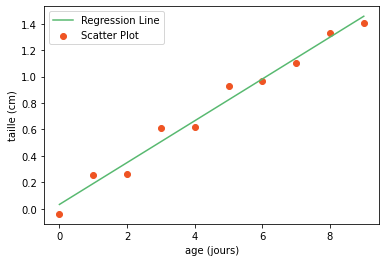

In [37]:
max_age = np.max(age) 
min_age = np.min(age) 
# Calculating line values x and y
x = np.linspace(min_age, max_age, 10)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(age, taille, c='#ef5423', label='Scatter Plot')

plt.xlabel('age (jours)')
plt.ylabel('taille (cm)')
plt.legend()
plt.show()

In [31]:
rmse = 0
for i in range(m):
    taille_pred=  b0 + b1* age[i]
    rmse += (taille[i] - taille_pred) ** 2
    
rmse = np.sqrt(rmse)
print(rmse)

0.6828679582794263


In [38]:
sumofsquares = 0
sumofresiduals = 0 
for i in range(m) :
    taille_pred = b0 + b1 * age[i]
    sumofsquares += (taille[i] - moyenne_taille) ** 2
    sumofresiduals += (taille[i] - taille_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.9780366251219357


In [59]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# library & dataset
import seaborn as sns
#df = sns.load_dataset('iris')
#import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [42]:
df = pd.DataFrame(load_boston().data)
df.columns = load_boston().feature_names
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [54]:
df['PRICE'] = load_boston().target
Price = df[["PRICE"]]
Crim = df[["CRIM"]]
Zn = df[["ZN"]]
Indus = df[["INDUS"]]
Chas = df[["CHAS"]]
Nox = df[["NOX"]]
Rm = df[["RM"]]
Age = df[["AGE"]]
Dis = df[["DIS"]]
Rad = df[["RAD"]]
Tax = df[["TAX"]]
Ptratio = df[["PTRATIO"]]
B = df[["B"]]
Lstat = df[["LSTAT"]]
print(Price)

     PRICE
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34,21.4
97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7
98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57,43.8


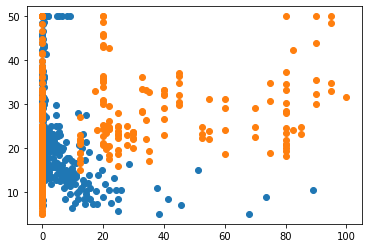

In [58]:
display(df.head(100))
plt.scatter(Crim, Price)
plt.scatter(Zn, Price)

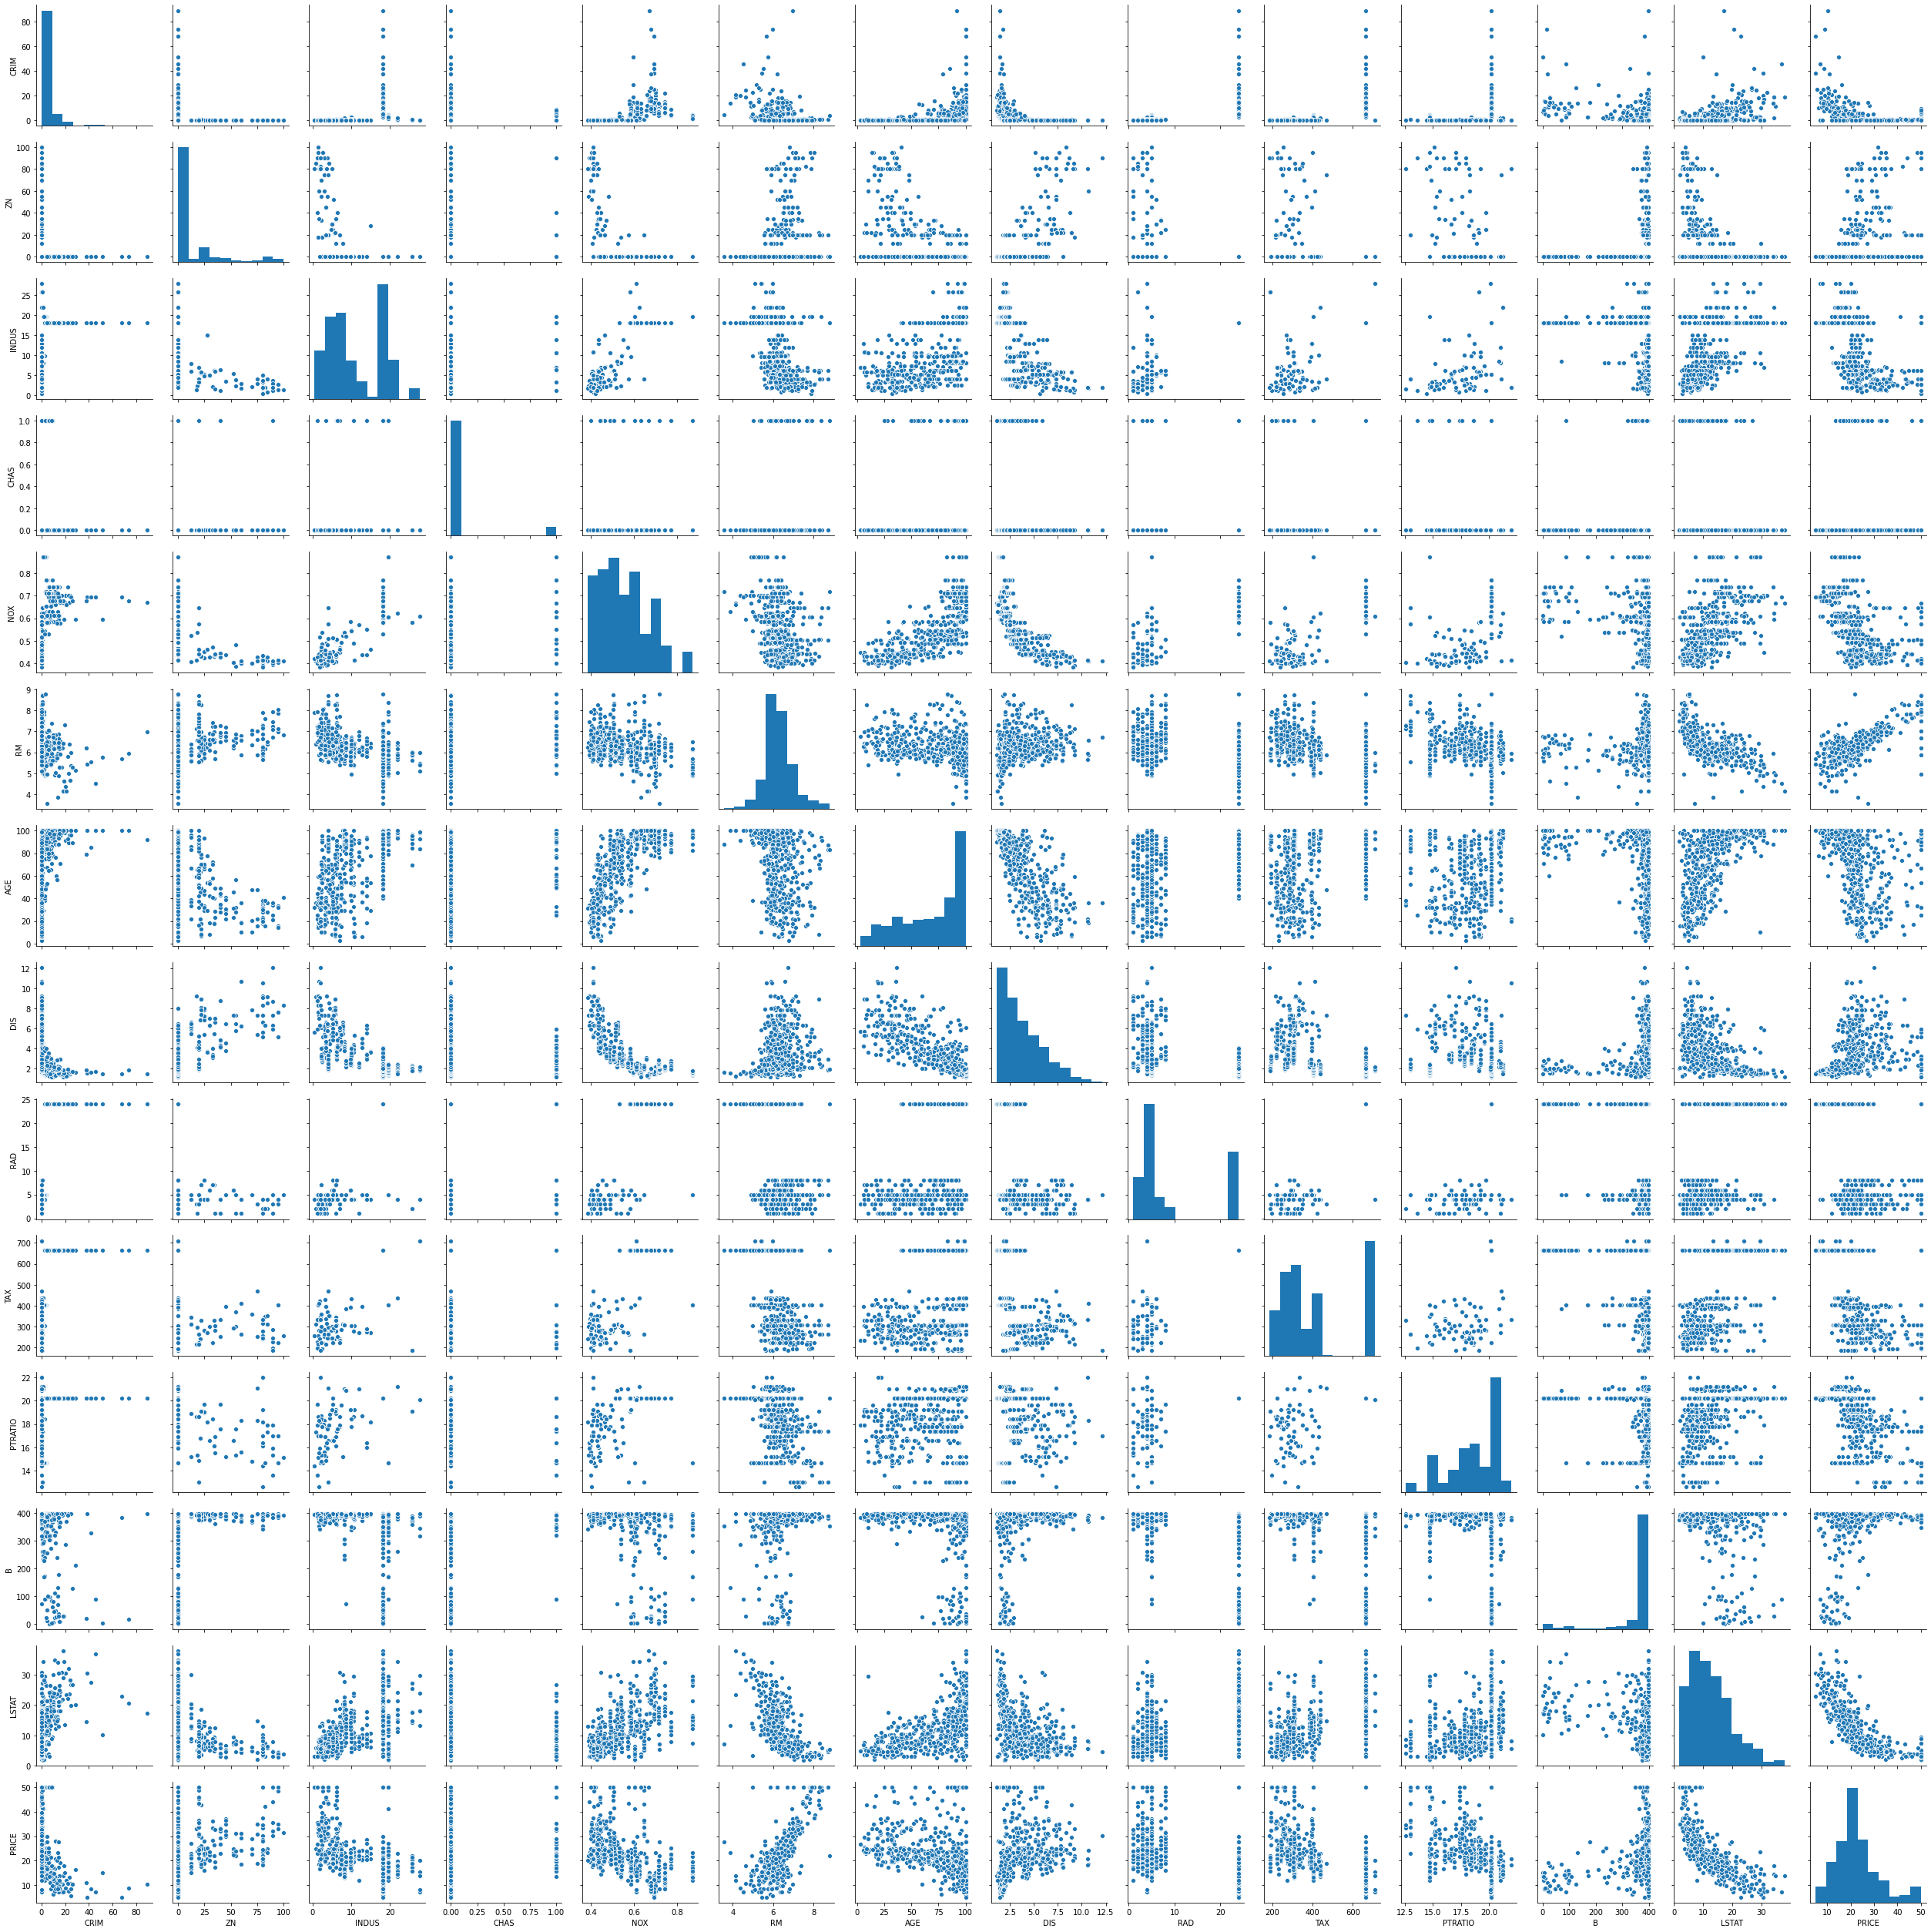

In [61]:
# Basic correlogram
sns.pairplot(df)



In [62]:
import numpy as np
from sklearn.model_selection import train_test_split 
X = df.drop(["PRICE"], axis=1)
y = df.PRICE
#gapminder_ocean.drop(['pop'], axis=1)


In [71]:
liste_score = []
for i in range(10):
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    
    
    print(X_train.shape, X_test.shape)
    
    import numpy as np
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(X_train, y_train)
    reg.score(X_train, y_train)
    liste_score.append(reg.score(X_train, y_train))
    print(liste_score)


(404, 13) (102, 13)
[0.7730135569264234]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111, 0.7415244219726307]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111, 0.7415244219726307, 0.7383393920590519]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111, 0.7415244219726307, 0.7383393920590519, 0.7515229944409221]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111, 0.7415244219726307, 0.7383393920590519, 0.7515229944409221, 0.7698532963729757]
(404, 13) (102, 13)
[0.7730135569264234, 0.7293585058196337, 0.7285831776605591, 0.7239410298290111, 0.741524421

In [72]:
np.mean(liste_score)

0.7432574127260041

In [78]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(LinearRegression(), X, y, cv=5)
print(scores)
np.mean(scores)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


0.3532759243958823